### EDA

In [ ]:
# ============================
# Global Research Dataset EDA
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

# ----------------------------
# 1. Load Dataset
# ----------------------------

df = pd.read_csv(r"C:\Users\Parul\Documents\OPSA\opsa-research-dashboard\data\publications.csv")
df.head()

,Name,Web of Science Documents,Times Cited,Collab-CNCI,Rank,% Docs Cited,Category Normalized Citation Impact,% Documents in Top 1%,% Documents in Top 10%,Documents in Top 1%,Documents in Top 10%,year
0,SWITZERLAND,24154,2705248,0.946748,8,97.93,1.024815,0.89,10.87,97,230,2023
1,CHINA,2185,157320,1.575928,44,99.60,0.900623,2.98,19.26,323,121,2014
2,CHINA,6896,744768,1.032983,42,95.23,1.679004,1.08,11.36,455,662,2013
3,UNITED KINGDOM,2399,177526,1.586585,3,99.21,1.444246,1.63,10.20,98,2463,2005
4,ITALY,10753,301084,0.812773,2,98.35,1.252122,0.81,17.43,440,134,2004


In [9]:
# ----------------------------
# 2. Basic Structure
# ----------------------------

print("Rows, Columns:", df.shape)
df.info()
df.describe()

Rows, Columns: (1000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 1000 non-null   object 
 1   Web of Science Documents             1000 non-null   int64  
 2   Times Cited                          1000 non-null   int64  
 3   Collab-CNCI                          1000 non-null   float64
 4   Rank                                 1000 non-null   int64  
 5   % Docs Cited                         1000 non-null   float64
 6   Category Normalized Citation Impact  1000 non-null   float64
 7   % Documents in Top 1%                1000 non-null   float64
 8   % Documents in Top 10%               1000 non-null   float64
 9   Documents in Top 1%                  1000 non-null   int64  
 10  Documents in Top 10%                 1000 non-null   int64  
 11  year 

,Web of Science Documents,Times Cited,Collab-CNCI,Rank,% Docs Cited,Category Normalized Citation Impact,% Documents in Top 1%,% Documents in Top 10%,Documents in Top 1%,Documents in Top 10%,year
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000
mean,14861.699000,1.296497e+06,1.214932,24.722000,97.410690,1.291637,1.76760,17.58979,261.327000,1497.457000,2013.860000
std,8390.150609,9.670633e+05,0.230261,14.108145,1.419199,0.234461,0.71711,4.36310,136.904576,844.902713,6.748477
min,512.000000,2.184600e+04,0.800182,1.000000,95.000000,0.900623,0.50000,10.02000,12.000000,111.000000,2003.000000
25%,7616.750000,5.076700e+05,1.029402,12.000000,96.150000,1.087020,1.13000,13.77000,142.000000,736.750000,2008.000000
50%,14711.000000,1.064920e+06,1.214383,25.000000,97.385000,1.292028,1.81000,17.39000,261.500000,1481.000000,2014.000000
75%,22022.250000,1.899791e+06,1.415986,37.000000,98.652500,1.499628,2.39000,21.64000,382.000000,2202.250000,2020.000000
max,29959.000000,4.327668e+06,1.599646,49.000000,99.890000,1.698257,3.00000,24.99000,499.000000,2999.000000,2025.000000


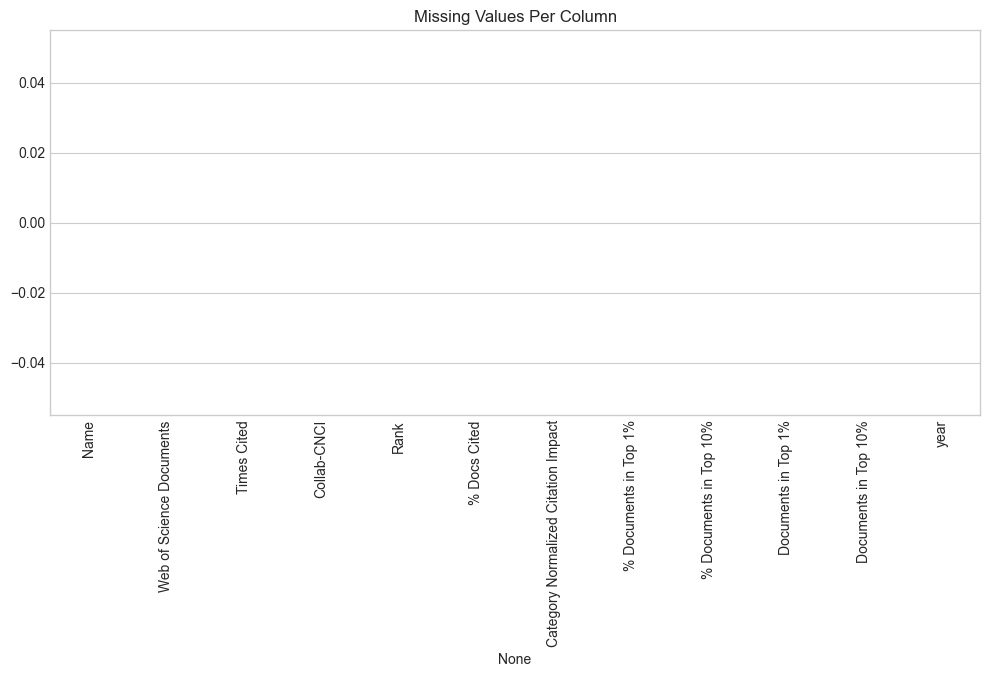

In [10]:
# ----------------------------
# 3. Missing Value Analysis
# ----------------------------

df.isnull().sum()

plt.figure(figsize=(12,5))
sns.barplot(x=df.isnull().sum().index, y=df.isnull().sum().values)
plt.xticks(rotation=90)
plt.title("Missing Values Per Column")
plt.show()

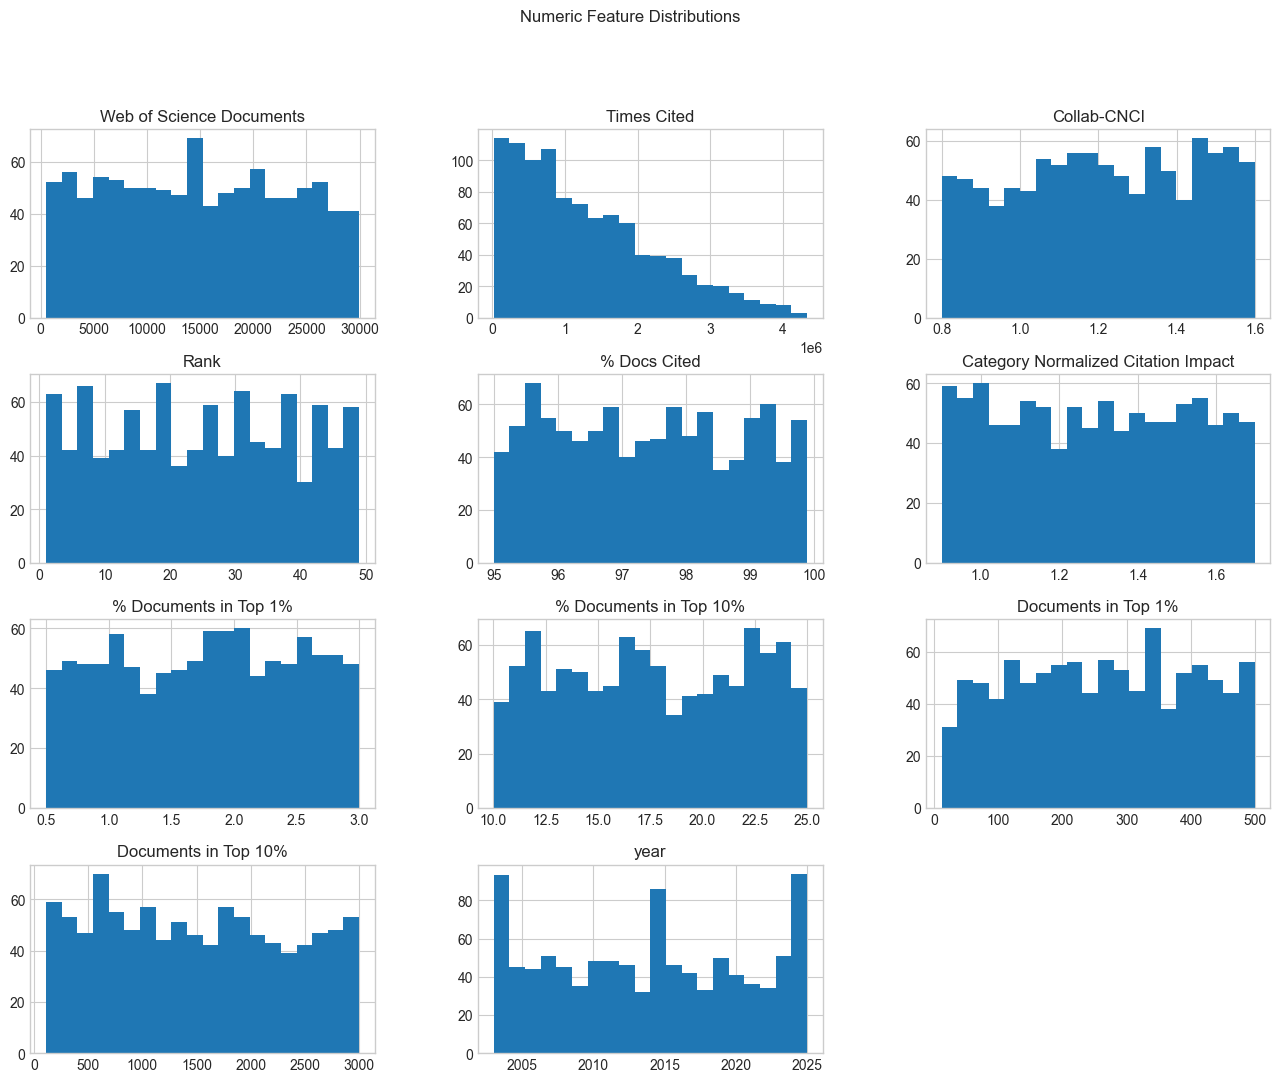

In [ ]:
# ----------------------------
# 4. Numeric Distributions
# ----------------------------

num_cols = df.select_dtypes(include=[np.number]).columns

df[num_cols].hist(figsize=(16,12), bins=20)
plt.suptitle("Numeric Feature Distributions")
plt.show()

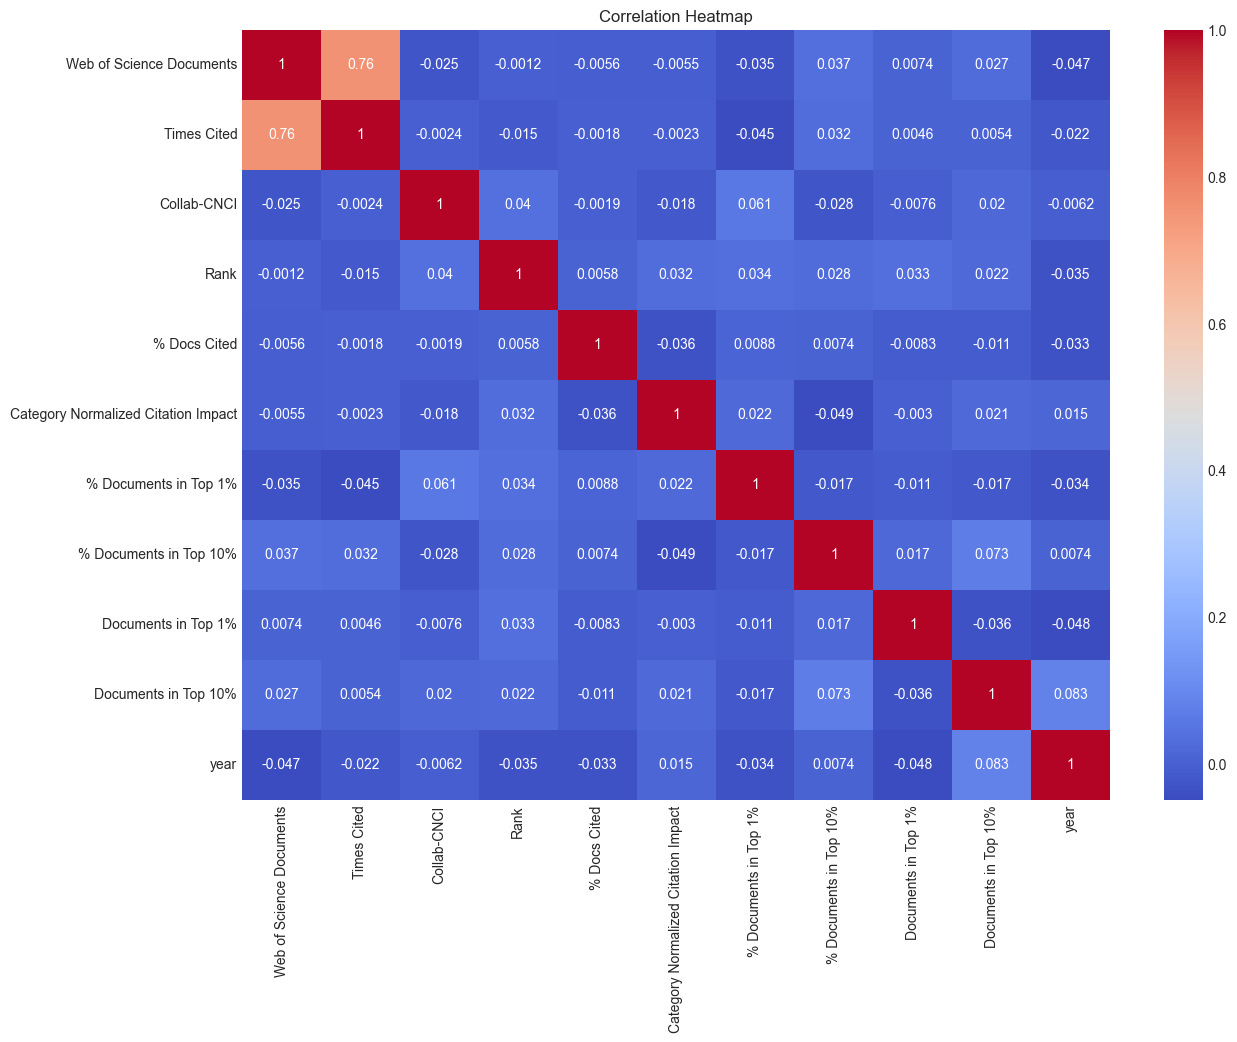

In [12]:
# ----------------------------
# 5. Correlation Heatmap
# ----------------------------

plt.figure(figsize=(14,10))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

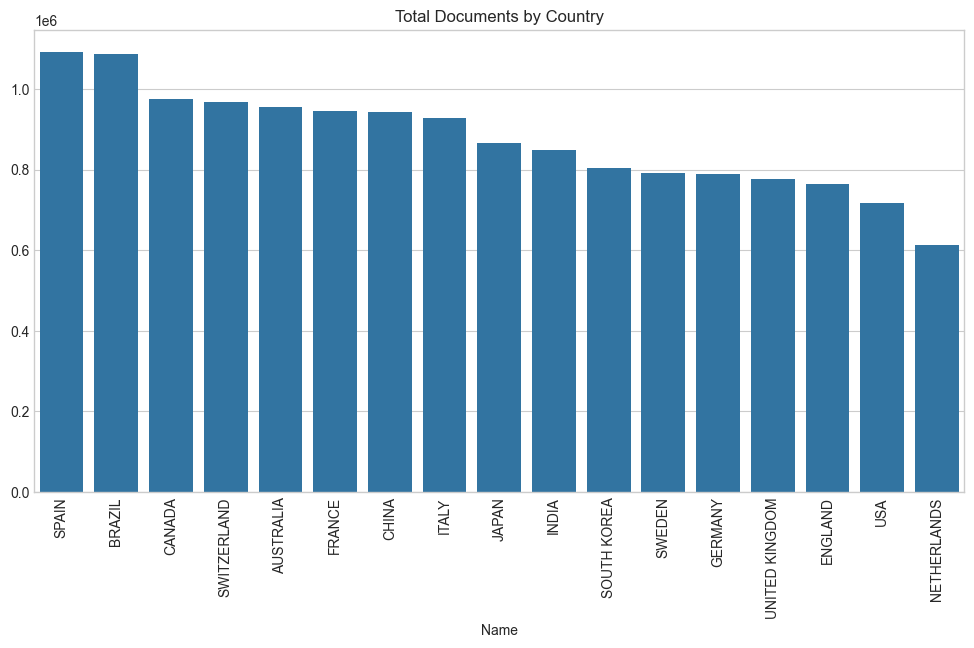

In [13]:
# ----------------------------
# 6. Research Output by Country
# ----------------------------

top_docs = df.groupby("Name")["Web of Science Documents"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=top_docs.index, y=top_docs.values)
plt.xticks(rotation=90)
plt.title("Total Documents by Country")
plt.show()

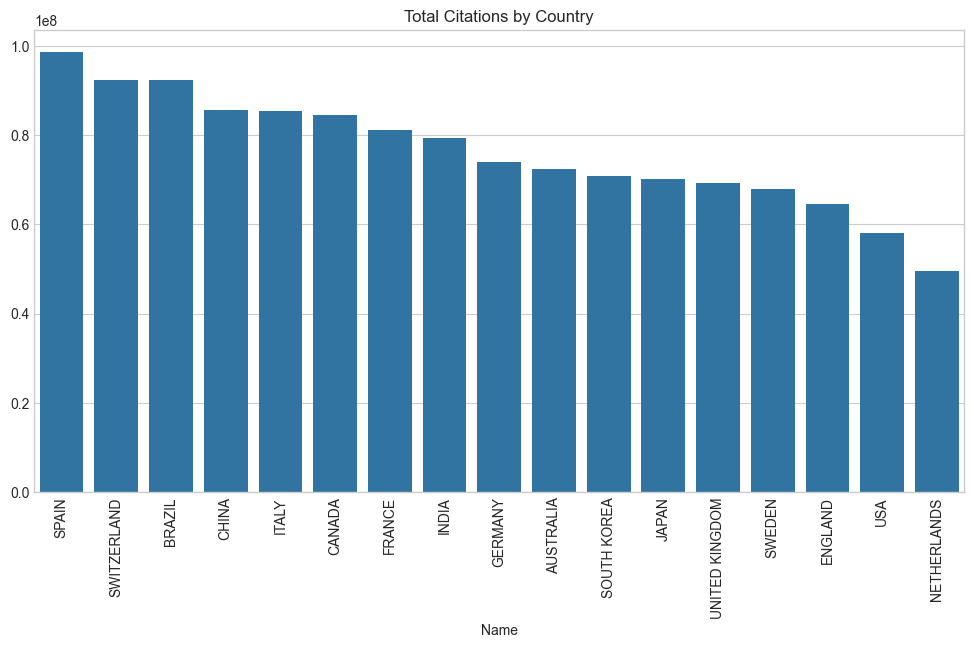

In [14]:
# ----------------------------
# 7. Citations by Country
# ----------------------------

top_cites = df.groupby("Name")["Times Cited"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=top_cites.index, y=top_cites.values)
plt.xticks(rotation=90)
plt.title("Total Citations by Country")
plt.show()


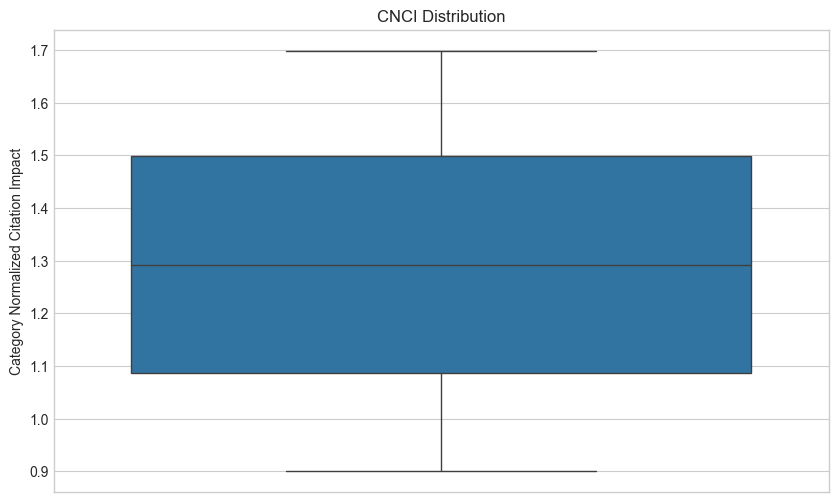

In [15]:
# ----------------------------
# 8. CNCI Distribution
# ----------------------------

plt.figure(figsize=(10,6))
sns.boxplot(df["Category Normalized Citation Impact"])
plt.title("CNCI Distribution")
plt.show()


In [ ]:
# ----------------------------
# 9. Excellence Metrics (Top 1% & 10%)
# ----------------------------

excellence = df[["Name", "Documents in Top 1%", "Documents in Top 10%"]]

excellence.head()

,Name,Documents in Top 1%,Documents in Top 10%
0,SWITZERLAND,97,230
1,CHINA,323,121
2,CHINA,455,662
3,UNITED KINGDOM,98,2463
4,ITALY,440,134


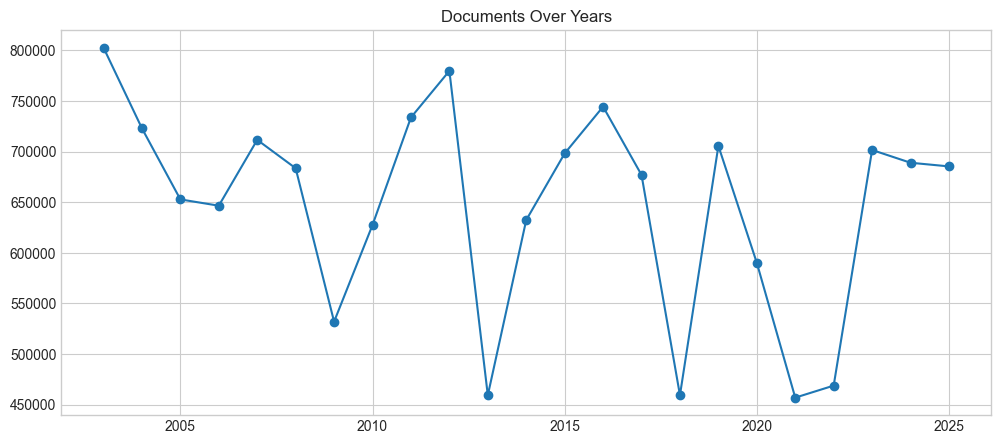

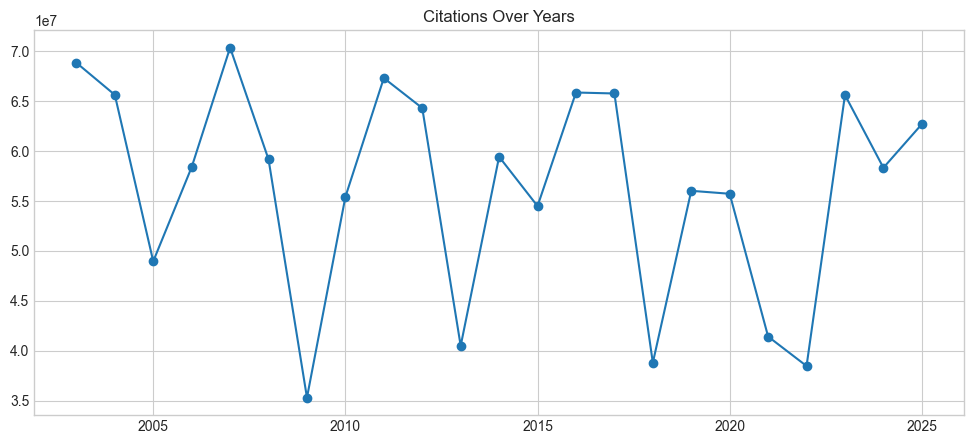

In [ ]:
# ----------------------------
# 10. Yearly Trends
# ----------------------------

if "year" in df.columns:
    yearly_docs = df.groupby("year")["Web of Science Documents"].sum()
    yearly_cites = df.groupby("year")["Times Cited"].sum()

    plt.figure(figsize=(12,5))
    plt.plot(yearly_docs.index, yearly_docs.values, marker="o")
    plt.title("Documents Over Years")
    plt.show()

    plt.figure(figsize=(12,5))
    plt.plot(yearly_cites.index, yearly_cites.values, marker="o")
    plt.title("Citations Over Years")
    plt.show()

In [18]:
# ----------------------------
# 11. Derived KPI Calculations
# ----------------------------

df["Citation Efficiency"] = df["Times Cited"] / df["Web of Science Documents"]
df["Excellence Rate (Top 1%)"] = df["Documents in Top 1%"] / df["Web of Science Documents"]
df["High Impact Rate (Top 10%)"] = df["Documents in Top 10%"] / df["Web of Science Documents"]
df["Citation Quality Index"] = df["Category Normalized Citation Impact"] * df["Citation Efficiency"]

df.head()


,Name,Web of Science Documents,Times Cited,Collab-CNCI,Rank,% Docs Cited,Category Normalized Citation Impact,% Documents in Top 1%,% Documents in Top 10%,Documents in Top 1%,Documents in Top 10%,year,Citation Efficiency,Excellence Rate (Top 1%),High Impact Rate (Top 10%),Citation Quality Index
0,SWITZERLAND,24154,2705248,0.946748,8,97.93,1.024815,0.89,10.87,97,230,2023,112.0,0.004016,0.009522,114.779280
1,CHINA,2185,157320,1.575928,44,99.60,0.900623,2.98,19.26,323,121,2014,72.0,0.147826,0.055378,64.844856
2,CHINA,6896,744768,1.032983,42,95.23,1.679004,1.08,11.36,455,662,2013,108.0,0.065980,0.095998,181.332432
3,UNITED KINGDOM,2399,177526,1.586585,3,99.21,1.444246,1.63,10.20,98,2463,2005,74.0,0.040850,1.026678,106.874204
4,ITALY,10753,301084,0.812773,2,98.35,1.252122,0.81,17.43,440,134,2004,28.0,0.040919,0.012462,35.059416


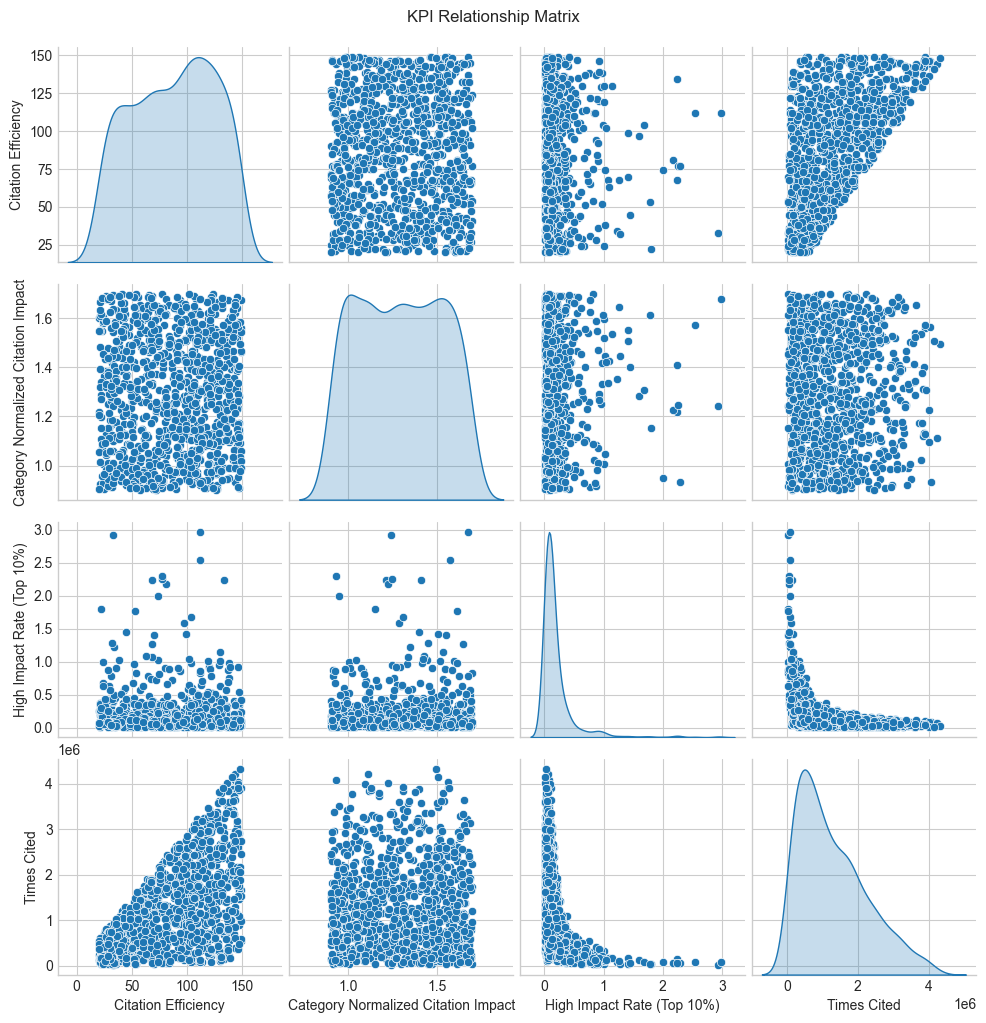

In [19]:
# ----------------------------
# 12. KPI Relationships
# ----------------------------

sns.pairplot(
    df[["Citation Efficiency", "Category Normalized Citation Impact", 
        "High Impact Rate (Top 10%)", "Times Cited"]],
    diag_kind="kde"
)
plt.suptitle("KPI Relationship Matrix", y=1.02)
plt.show()

In [ ]:
# import sys
# import os

# # Add project root to Python path
# ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
# if ROOT_DIR not in sys.path:
#     sys.path.insert(0, ROOT_DIR)